## Homework_7

In [1]:
import numpy as np

In [2]:
from math import sqrt

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
# Произвести расчет с использованием intercept

In [4]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [5]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [6]:
b = (np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [7]:
n = len(X)
n

10

In [8]:
b = (n*(np.sum(X*y)) - (np.sum(X) * np.sum(y)))/(n*(np.sum(X**2))-((np.sum(X)**2)))
b

2.6205388824027653

In [9]:
a = np.mean(y) - b*np.mean(X)
a

444.17735732435955

In [10]:
y_hat = 444.18 + 2.621*X
y_hat

array([535.915, 562.125, 942.17 , 968.38 , 549.02 , 627.65 , 585.714,
       837.33 , 758.7  , 732.49 ])

In [11]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [12]:
mse=((y-y_hat)**2).sum()/n
mse

6470.417384600003

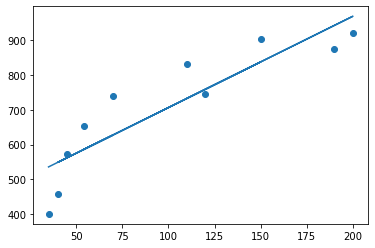

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(X,y) 
plt.plot(X,444.18 + 2.621*X)
plt.show()

In [14]:
# Произвести расчет без использования intercept

In [15]:
import seaborn as sns

In [16]:
len(X)

10

In [17]:
X = X.reshape((len(X),1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [18]:
y = y.reshape((len(X),1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [19]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[5.88982042]])

In [20]:
y_hat = B*X
y_hat

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

In [21]:
mse=((y-y_hat)**2).sum()/n
mse

56516.8584157194

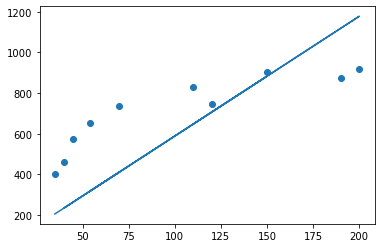

In [22]:
%matplotlib inline
plt.scatter(X,y) 
plt.plot(X,5.88982*X)
plt.show()

2.	Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [23]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [24]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [25]:
def mse_(B1,y=y,X=X,n=len(X)): 
    return np.sum((B1*X-y)**2)/n

In [26]:
alpha = 1e-6
alpha

1e-06

In [27]:
B1 = 0.1

In [28]:
n = len(X)

In [29]:
for i in range (700):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%50==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 50, B1=4.497229618367758, mse=83233.94472982832
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 150, B1=5.804626485478126, mse=56616.849068093856
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 250, B1=5.884608547059329, mse=56517.232638059555
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 350, B1=5.889501575592372, mse=56516.85981627392
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 450, B1=5.889800914315978, mse=56516.858420961085
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 550, B1=5.889819226833643, mse=56516.858415739014
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 650, B1=5.889820347130743, mse=56516.858415719485


In [30]:
mse_(5.8898202)

56516.858415720075

3.	В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, когда известна сигма - среднеквадрати́ческое отклоне́ние.

Для вычисления доверительных интервалов и проверки статистических гипотез используется таблица критических точек распределения Стьюдента, когда неизвестна сигма - среднеквадрати́ческое отклоне́ние

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [31]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [32]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [33]:
def mse_(A1,B1,y=y,X=X,n=len(X)): 
    return np.sum(((A1+B1*X)-y)**2)/n

In [34]:
alpha = 1e-6
alpha

1e-06

In [35]:
B1 = 0.1

In [36]:
A1 = 500

In [37]:
n = len(X)

In [38]:
for i in range (9000):
    A1 -= alpha*(1/n)*np.sum((A1+B1*X-y)**2)
    B1 -= alpha*(2/n)*np.sum((A1+B1*X-y)*X)
    if i%50==0:
        print('Iteration: {i}, A1={A1}, B1={B1} mse={mse}'.format(i=i, A1=A1, B1=B1, mse=mse_(A1, B1)))

Iteration: 0, A1=499.931423674, B1=0.15814198727891282 mse=65269.809299702174
Iteration: 50, A1=498.5620970428372, B1=1.7083844502791257 mse=10830.242822178185
Iteration: 100, A1=498.13867785268485, B1=2.0951713911821184 mse=7435.448084559376
Iteration: 150, A1=497.77449146799864, B1=2.192919897203205 mse=7214.224415877101
Iteration: 200, A1=497.41449668034943, B1=2.219096219195724 mse=7190.619429927283
Iteration: 250, A1=497.05523895751077, B1=2.2275621599450024 mse=7179.87591187347
Iteration: 300, A1=496.69648436422193, B1=2.2316445827581375 mse=7170.162916544892
Iteration: 350, A1=496.338210278141, B1=2.234640098007799 mse=7160.62811778048
Iteration: 400, A1=495.98041051950935, B1=2.237364139722291 mse=7151.187401312166
Iteration: 450, A1=495.62308079498564, B1=2.2400184228469366 mse=7141.827471952313
Iteration: 500, A1=495.26621715669523, B1=2.242652861734761 mse=7132.5452531452365
Iteration: 550, A1=494.9098157471764, B1=2.2452798236664515 mse=7123.3397499154
Iteration: 600, A1=49

Iteration: 5100, A1=463.95928412987166, B1=2.4732305876818037 mse=6569.719682384302
Iteration: 5150, A1=463.63087845987764, B1=2.4756486138158604 mse=6566.451133169027
Iteration: 5200, A1=463.3026348378186, B1=2.4780654325845224 mse=6563.238872643322
Iteration: 5250, A1=462.97455045190844, B1=2.4804810647117606 mse=6560.082793034136
Iteration: 5300, A1=462.64662249570205, B1=2.482895530881731 mse=6556.982788529598
Iteration: 5350, A1=462.31884816799703, B1=2.485308851739492 mse=6553.93875527145
Iteration: 5400, A1=461.99122467273577, B1=2.487721047891724 mse=6550.9505913475605
Iteration: 5450, A1=461.66374921890883, B1=2.4901321399074456 mse=6548.018196784665
Iteration: 5500, A1=461.33641902045855, B1=2.4925421483187313 mse=6545.141473541197
Iteration: 5550, A1=461.0092312961813, B1=2.494951093621423 mse=6542.320325500268
Iteration: 5600, A1=460.6821832696333, B1=2.4973589962758322 mse=6539.554658462818
Iteration: 5650, A1=460.35527216903336, B1=2.499765876707451 mse=6536.844380140892


In [39]:
mse_(444.1241, 2.61925)

6470.453844137501